In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from environment import Environment, DirectedTree, DEFAULT, CONSTITUENT
from prouter import Router
from sampler import Sampler, strategies

c:\users\albert\projekte\swmmpulse\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def preparation_env():
    print(f"Preparing environment")
    env = Environment()
    print(f"Reading swmm-outfile")
    env.read_swmmoutfile(r"C:\Users\albert/Documents/SWMMpulse/HS_calib_120_simp.out")
    print(f"Preparing graph")
    graph = DirectedTree.from_swmm(r"C:\Users\albert/Documents/SWMMpulse/HS_calib_120_simp.inp")
    node_data = pd.read_csv(r"C:\Users\albert/Documents/SWMMpulse/HS_calib_120_simp/pop_node_data.csv")
    node_data = node_data.set_index("NAME").to_dict(orient="index")
    graph.add_nodevalues(node_data)
    env.add_graph(graph)
    print(f"finished preparing environment")
    return env

In [4]:
env = preparation_env()
router = Router()

router.add_environment(env)
packets = router.environment.get_packets()

routetable = router.route(packets=packets)

processed = router.postprocess(routetable, packets, DEFAULT.DEFAULT_CONSTITUENTS.get(CONSTITUENT.COV))

Preparing environment
Reading swmm-outfile
Preparing graph
finished preparing environment


<AxesSubplot:>

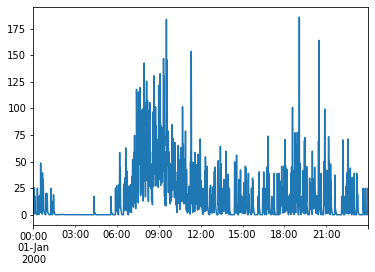

In [5]:
df = pd.DataFrame(processed, index=pd.date_range("2000-01-01", freq="10S", periods=8640))
df.sum(axis=1).plot()

In [13]:
sampler = Sampler()
#df.sum(axis=1)
sampler.sample(df_timeseries=pd.DataFrame(df.sum(axis=1)), strategy=strategies["A"])

0    14.842084
Name: concentration, dtype: float64

In [18]:
strategies

{'A': {'kind': 'time',
  'samplingfreq': '1H',
  'samplingduration': 60,
  'volume': 250},
 'B': {'kind': 'time',
  'samplingfreq': '0.3333333333333333H',
  'samplingduration': 60,
  'volume': 250},
 'C': {'kind': 'flow',
  'samplingfreq': '1H',
  'samplingduration': 60,
  'volume': 200},
 'D': {'kind': 'flow',
  'samplingfreq': '0.3333333333333333H',
  'samplingduration': 60,
  'volume': 200},
 'E': {'kind': 'volume',
  'samplecount': 24,
  'samplingduration': 60,
  'volume': 50},
 'F': {'kind': 'volume',
  'samplecount': 72,
  'samplingduration': 60,
  'volume': 250},
 'G': {'kind': 'grab',
  'samplingtime': datetime.time(9, 0),
  'samplingduration': 120,
  'volume': 1000},
 'H': {'kind': 'grab',
  'samplingtime': datetime.time(12, 0),
  'samplingduration': 120,
  'volume': 1000}}

In [17]:
import datetime as dt
dt.timedelta(days=1) / pd.to_timedelta("4H")

6.0